# Import Libraries

In [149]:
import os
import seaborn as sns
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D

from scipy.interpolate import griddata

from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pickle as pkl

In [150]:
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [151]:
curr_dir = (os.getcwd()).replace('\\', '/')
data_path = (os.path.join(curr_dir, 'Data')).replace('\\', '/')

## Stream Sediment Data

In [152]:
str_sed_data = pd.read_csv(data_path + '/stream_sediments_57F11.csv')

In [153]:
str_sed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 71 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gid        203 non-null    int64  
 1   objectid   203 non-null    int64  
 2   sampleno   203 non-null    object 
 3   longitude  203 non-null    float64
 4   latitude   203 non-null    float64
 5   sio2       203 non-null    float64
 6   al2o3      203 non-null    float64
 7   fe2o3      203 non-null    float64
 8   tio2       203 non-null    float64
 9   cao        203 non-null    float64
 10  mgo        203 non-null    float64
 11  mno        203 non-null    float64
 12  na2o       203 non-null    float64
 13  k2o        203 non-null    float64
 14  p2o5       203 non-null    float64
 15  loi        203 non-null    float64
 16  ba         203 non-null    float64
 17  ga         203 non-null    float64
 18  sc         203 non-null    float64
 19  v          203 non-null    float64
 20  th        

Max and Min:
- Longitude
- Latitude

In [154]:
sed_max_long = max(str_sed_data['longitude'])
sed_min_long = min(str_sed_data['longitude'])

sed_max_lat = max(str_sed_data['latitude'])
sed_min_lat = min(str_sed_data['latitude'])

print("Stream Sediment coordinates - ")

print(f"Maximum longitude co-ordinate: {sed_max_long}")
print(f"Minimum longitude co-ordinate: {sed_min_long}")

print(f"Maximum latitude co-ordinate: {sed_max_lat}")
print(f"Minimum latitude co-ordinate: {sed_min_lat}")

Stream Sediment coordinates - 
Maximum longitude co-ordinate: 77.749999
Minimum longitude co-ordinate: 77.5
Maximum latitude co-ordinate: 14.493242
Minimum latitude co-ordinate: 14.259009


In [155]:
str_sed_data.head()

,gid,objectid,sampleno,longitude,latitude,sio2,al2o3,fe2o3,tio2,cao,...,u,pt,pd,toposheet,in_,f,te,tl,hg,cd
0,2947,2947,57F11/177/SS/12,77.657407,14.475225,61.921,14.606,4.51,0.05,2.28,...,3.016905,0,0,57F11,0,0,0,0,8.0,50
1,2948,2948,57F11/178/SS/12,77.675926,14.475225,62.077,13.750,4.22,0.05,2.43,...,3.378550,0,0,57F11,0,0,0,0,9.0,50
2,2949,2949,57F11/179/SS/12,77.694444,14.475225,68.645,13.410,3.02,0.05,1.32,...,3.509000,0,0,57F11,0,0,0,0,2.5,50
3,2950,2950,57F11/180/SS/12,77.712963,14.475225,64.950,14.280,3.46,0.05,1.75,...,4.241000,0,0,57F11,0,0,0,0,19.0,50
4,2951,2951,57F11/181/SS/12,77.731481,14.475225,64.302,14.010,4.08,0.05,1.84,...,4.218000,0,0,57F11,0,0,0,0,19.0,50


## Gravity Data

In [156]:
gravity_data = pd.read_csv(data_path + '/gravity_57F11.csv')

In [157]:
gravity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gid         363 non-null    int64  
 1   objectid    363 non-null    int64  
 2   longitude_  363 non-null    float64
 3   latitude_r  363 non-null    float64
 4   elevation_  363 non-null    int64  
 5   observed_g  363 non-null    int64  
 6   theoretica  363 non-null    int64  
 7   bouguer_an  363 non-null    int64  
 8   toposheet   363 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 25.6+ KB


In [158]:
gravity_data.head()

,gid,objectid,longitude_,latitude_r,elevation_,observed_g,theoretica,bouguer_an,toposheet
0,386966,386966,77.6264,14.2569,443,978167,978345,-91,57F/11
1,386967,386967,77.6278,14.2653,438,978168,978346,-91,57F/11
2,386968,386968,77.6281,14.2750,434,978170,978346,-90,57F/11
3,386969,386969,77.6292,14.2839,429,978170,978347,-91,57F/11
4,386970,386970,77.6286,14.2931,421,978173,978347,-90,57F/11


In [159]:
grav_max_long = max(gravity_data['longitude_'])
grav_min_long = min(gravity_data['longitude_'])

grav_max_lat = max(gravity_data['latitude_r'])
grav_min_lat = min(gravity_data['latitude_r'])

print("Gravity coordinates - ")

print(f"Maximum longitude co-ordinate: {grav_max_long}")
print(f"Minimum longitude co-ordinate: {grav_min_long}")

print(f"Maximum latitude co-ordinate: {grav_max_lat}")
print(f"Minimum latitude co-ordinate: {grav_min_lat}")

Gravity coordinates - 
Maximum longitude co-ordinate: 77.7489
Minimum longitude co-ordinate: 77.5006
Maximum latitude co-ordinate: 14.5
Minimum latitude co-ordinate: 14.2514


## Magnetic Data

In [160]:
magnetic_data = pd.read_csv(data_path + '/magnetic_57F11.csv')

In [161]:
magnetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gid         337 non-null    int64  
 1   objectid    337 non-null    int64  
 2   observed_m  337 non-null    float64
 3   igrf_nt     337 non-null    float64
 4   magnetic_a  337 non-null    float64
 5   longitude_  337 non-null    float64
 6   latitude_r  337 non-null    float64
 7   toposheet   337 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 21.2+ KB


In [162]:
magnetic_data.head()

,gid,objectid,observed_m,igrf_nt,magnetic_a,longitude_,latitude_r,toposheet
0,317368,317368,40872.13132,41573.71077,-701.579447,77.66925,14.30908,57F/11
1,317369,317369,41135.13264,41629.78027,-494.647631,77.65450,14.49714,57F/11
2,317370,317370,41152.13245,41621.69501,-469.562560,77.66114,14.46881,57F/11
3,317371,317371,41165.13195,41604.09323,-438.961281,77.54458,14.44861,57F/11
4,317372,317372,41203.13215,41609.26900,-406.136845,77.65169,14.43136,57F/11


In [163]:
mag_max_long = max(magnetic_data['longitude_'])
mag_min_long = min(magnetic_data['longitude_'])

mag_max_lat = max(magnetic_data['latitude_r'])
mag_min_lat = min(magnetic_data['latitude_r'])

print("Magnetic coordinates - ")

print(f"Maximum longitude co-ordinate: {mag_max_long}")
print(f"Minimum longitude co-ordinate: {mag_min_long}")

print(f"Maximum latitude co-ordinate: {mag_max_lat}")
print(f"Minimum latitude co-ordinate: {mag_min_lat}")

Magnetic coordinates - 
Maximum longitude co-ordinate: 77.74933
Minimum longitude co-ordinate: 77.50089
Maximum latitude co-ordinate: 14.49911
Minimum latitude co-ordinate: 14.25006


## Interpolation of Gravity and Magnetic anomalies at Sediment locations

In [164]:
grav_lat = gravity_data['latitude_r']
grav_long = gravity_data['longitude_']
grav_elevation = gravity_data['elevation_']
grav_bg_an = gravity_data['bouguer_an']

mag_lat = magnetic_data['latitude_r']
mag_long = magnetic_data['longitude_']
mag_an = magnetic_data['magnetic_a']

sed_lat = str_sed_data['latitude']
sed_long = str_sed_data['longitude']

In [165]:
elevation_interpolated = griddata((grav_lat, grav_long), grav_elevation, (sed_lat, sed_long), method='linear')
bouger_anomaly_interpolated = griddata((grav_lat, grav_long), grav_bg_an, (sed_lat, sed_long), method='linear')
magnetic_anomaly_interpolated = griddata((mag_lat, mag_long), mag_an, (sed_lat, sed_long), method='linear')

In [166]:
str_sed_data['interpolated_elevation'] = elevation_interpolated
str_sed_data['interpolated_bouger_anomaly'] = bouger_anomaly_interpolated
str_sed_data['interpolated_magnetic_anomaly'] = magnetic_anomaly_interpolated

str_sed_data.head()

,gid,objectid,sampleno,longitude,latitude,sio2,al2o3,fe2o3,tio2,cao,...,toposheet,in_,f,te,tl,hg,cd,interpolated_elevation,interpolated_bouger_anomaly,interpolated_magnetic_anomaly
0,2947,2947,57F11/177/SS/12,77.657407,14.475225,61.921,14.606,4.51,0.05,2.28,...,57F11,0,0,0,0,8.0,50,374.881622,-89.056606,60.049774
1,2948,2948,57F11/178/SS/12,77.675926,14.475225,62.077,13.750,4.22,0.05,2.43,...,57F11,0,0,0,0,9.0,50,369.412956,-89.795136,267.924225
2,2949,2949,57F11/179/SS/12,77.694444,14.475225,68.645,13.410,3.02,0.05,1.32,...,57F11,0,0,0,0,2.5,50,360.583097,-90.236797,3.797230
3,2950,2950,57F11/180/SS/12,77.712963,14.475225,64.950,14.280,3.46,0.05,1.75,...,57F11,0,0,0,0,19.0,50,355.814941,-90.000000,96.035242
4,2951,2951,57F11/181/SS/12,77.731481,14.475225,64.302,14.010,4.08,0.05,1.84,...,57F11,0,0,0,0,19.0,50,351.721784,-90.671204,192.970610


### Save the interpolated values into file

In [167]:
str_sed_data.to_csv(data_path+'/new_stream_sediments_57F11.csv', index=False)

## PCA

In [168]:
str_sed_data.head()

,gid,objectid,sampleno,longitude,latitude,sio2,al2o3,fe2o3,tio2,cao,...,toposheet,in_,f,te,tl,hg,cd,interpolated_elevation,interpolated_bouger_anomaly,interpolated_magnetic_anomaly
0,2947,2947,57F11/177/SS/12,77.657407,14.475225,61.921,14.606,4.51,0.05,2.28,...,57F11,0,0,0,0,8.0,50,374.881622,-89.056606,60.049774
1,2948,2948,57F11/178/SS/12,77.675926,14.475225,62.077,13.750,4.22,0.05,2.43,...,57F11,0,0,0,0,9.0,50,369.412956,-89.795136,267.924225
2,2949,2949,57F11/179/SS/12,77.694444,14.475225,68.645,13.410,3.02,0.05,1.32,...,57F11,0,0,0,0,2.5,50,360.583097,-90.236797,3.797230
3,2950,2950,57F11/180/SS/12,77.712963,14.475225,64.950,14.280,3.46,0.05,1.75,...,57F11,0,0,0,0,19.0,50,355.814941,-90.000000,96.035242
4,2951,2951,57F11/181/SS/12,77.731481,14.475225,64.302,14.010,4.08,0.05,1.84,...,57F11,0,0,0,0,19.0,50,351.721784,-90.671204,192.970610


In [169]:
str_sed_data.drop(['interpolated_elevation', 
                   'interpolated_bouger_anomaly', 
                   'interpolated_magnetic_anomaly'], 
                  axis=1, 
                  inplace=True)

### Elements composition from different samples

In [170]:
rem_elem = []
for col in str_sed_data.columns:
    if (str_sed_data[col] == 0).all():
        rem_elem.append(col)
print(f"Elements which don't contribute in the sediment composition: {rem_elem}")

Elements which don't contribute in the sediment composition: ['pt', 'pd', 'in_', 'f', 'te', 'tl']


In [171]:
str_sed_data.drop(rem_elem, axis=1, inplace=True)

In [172]:
str_sed_data.head()

,gid,objectid,sampleno,longitude,latitude,sio2,al2o3,fe2o3,tio2,cao,...,tm,yb,lu,hf,ta,w,u,toposheet,hg,cd
0,2947,2947,57F11/177/SS/12,77.657407,14.475225,61.921,14.606,4.51,0.05,2.28,...,0.359742,2.290226,0.413697,26.874492,0.677483,2.5,3.016905,57F11,8.0,50
1,2948,2948,57F11/178/SS/12,77.675926,14.475225,62.077,13.750,4.22,0.05,2.43,...,0.419132,2.891123,0.500104,37.079419,0.774466,2.5,3.378550,57F11,9.0,50
2,2949,2949,57F11/179/SS/12,77.694444,14.475225,68.645,13.410,3.02,0.05,1.32,...,0.329000,2.323000,0.423000,23.652000,0.715000,2.5,3.509000,57F11,2.5,50
3,2950,2950,57F11/180/SS/12,77.712963,14.475225,64.950,14.280,3.46,0.05,1.75,...,0.306000,2.186000,0.400000,21.961000,0.744000,2.5,4.241000,57F11,19.0,50
4,2951,2951,57F11/181/SS/12,77.731481,14.475225,64.302,14.010,4.08,0.05,1.84,...,0.334000,2.322000,0.431000,26.705000,0.832000,2.5,4.218000,57F11,19.0,50


In [173]:
str_elem = []

for col in list(str_sed_data.columns):
    if col not in ['gid', 
                   'objectid', 
                   'sampleno', 
                   'longitude', 
                   'latitude', 
                   'toposheet']:
        str_elem.append(col)

In [174]:
len(str_elem)

59

### Handling outliers

In [175]:
str_sed_data['au'].value_counts()

au
1.5      170
8.0        7
6.0        7
20.0       3
14.0       3
10.0       2
4.0        2
16.0       1
124.0      1
168.0      1
70.0       1
40.0       1
7.0        1
12.0       1
62.0       1
23.0       1
Name: count, dtype: int64

In [176]:
au_outl = str_sed_data[str_sed_data['au'] > 30]
au_outl

,gid,objectid,sampleno,longitude,latitude,sio2,al2o3,fe2o3,tio2,cao,...,tm,yb,lu,hf,ta,w,u,toposheet,hg,cd
62,3789,3789,57F11/043/SS/12,77.509259,14.313063,52.541,14.95,9.88,0.17,3.14,...,0.539447,3.179943,0.502557,5.442844,0.527944,2.5,0.989434,57F11,13.0,50
64,3791,3791,57F11/045/SS/12,77.546296,14.313063,58.653,14.89,6.43,0.09,1.99,...,0.416745,2.510682,0.421930,11.038305,0.633816,2.5,1.591886,57F11,6.0,50
106,3973,3973,57F11/086/SS/12,77.527778,14.367117,47.270,16.19,11.23,0.19,4.82,...,0.463314,2.994230,0.466425,4.415865,0.403556,2.5,1.098319,57F11,80.0,50
145,4083,4083,57F11/125/SS/12,77.731481,14.403153,57.420,15.29,5.29,0.06,2.07,...,0.368000,2.245000,0.377000,12.377000,1.296000,2.5,4.802000,57F11,8.0,50
161,4170,4170,57F11/141/SS/12,77.509259,14.439189,69.030,13.06,3.79,0.06,0.83,...,0.308023,1.891720,0.335482,17.255535,0.614254,2.5,2.170108,57F11,7.0,50


In [177]:
# Assuming you define 'neighbors' based on some logical geographical proximity
nbrs = NearestNeighbors(n_neighbors=5, 
                        algorithm='ball_tree').fit(str_sed_data[['latitude', 
                                                                 'longitude']])
distances, indices = nbrs.kneighbors(str_sed_data[['latitude', 
                                                   'longitude']])

for index, row in au_outl.iterrows():
    # Calculate the mean of the nearest neighbors excluding the outlier itself
    neighbor_indices = indices[index][1:]  # exclude the first index since it's the point itself
    mean_au = str_sed_data.iloc[neighbor_indices]['au'].mean()
    str_sed_data.at[index, 'au'] = mean_au

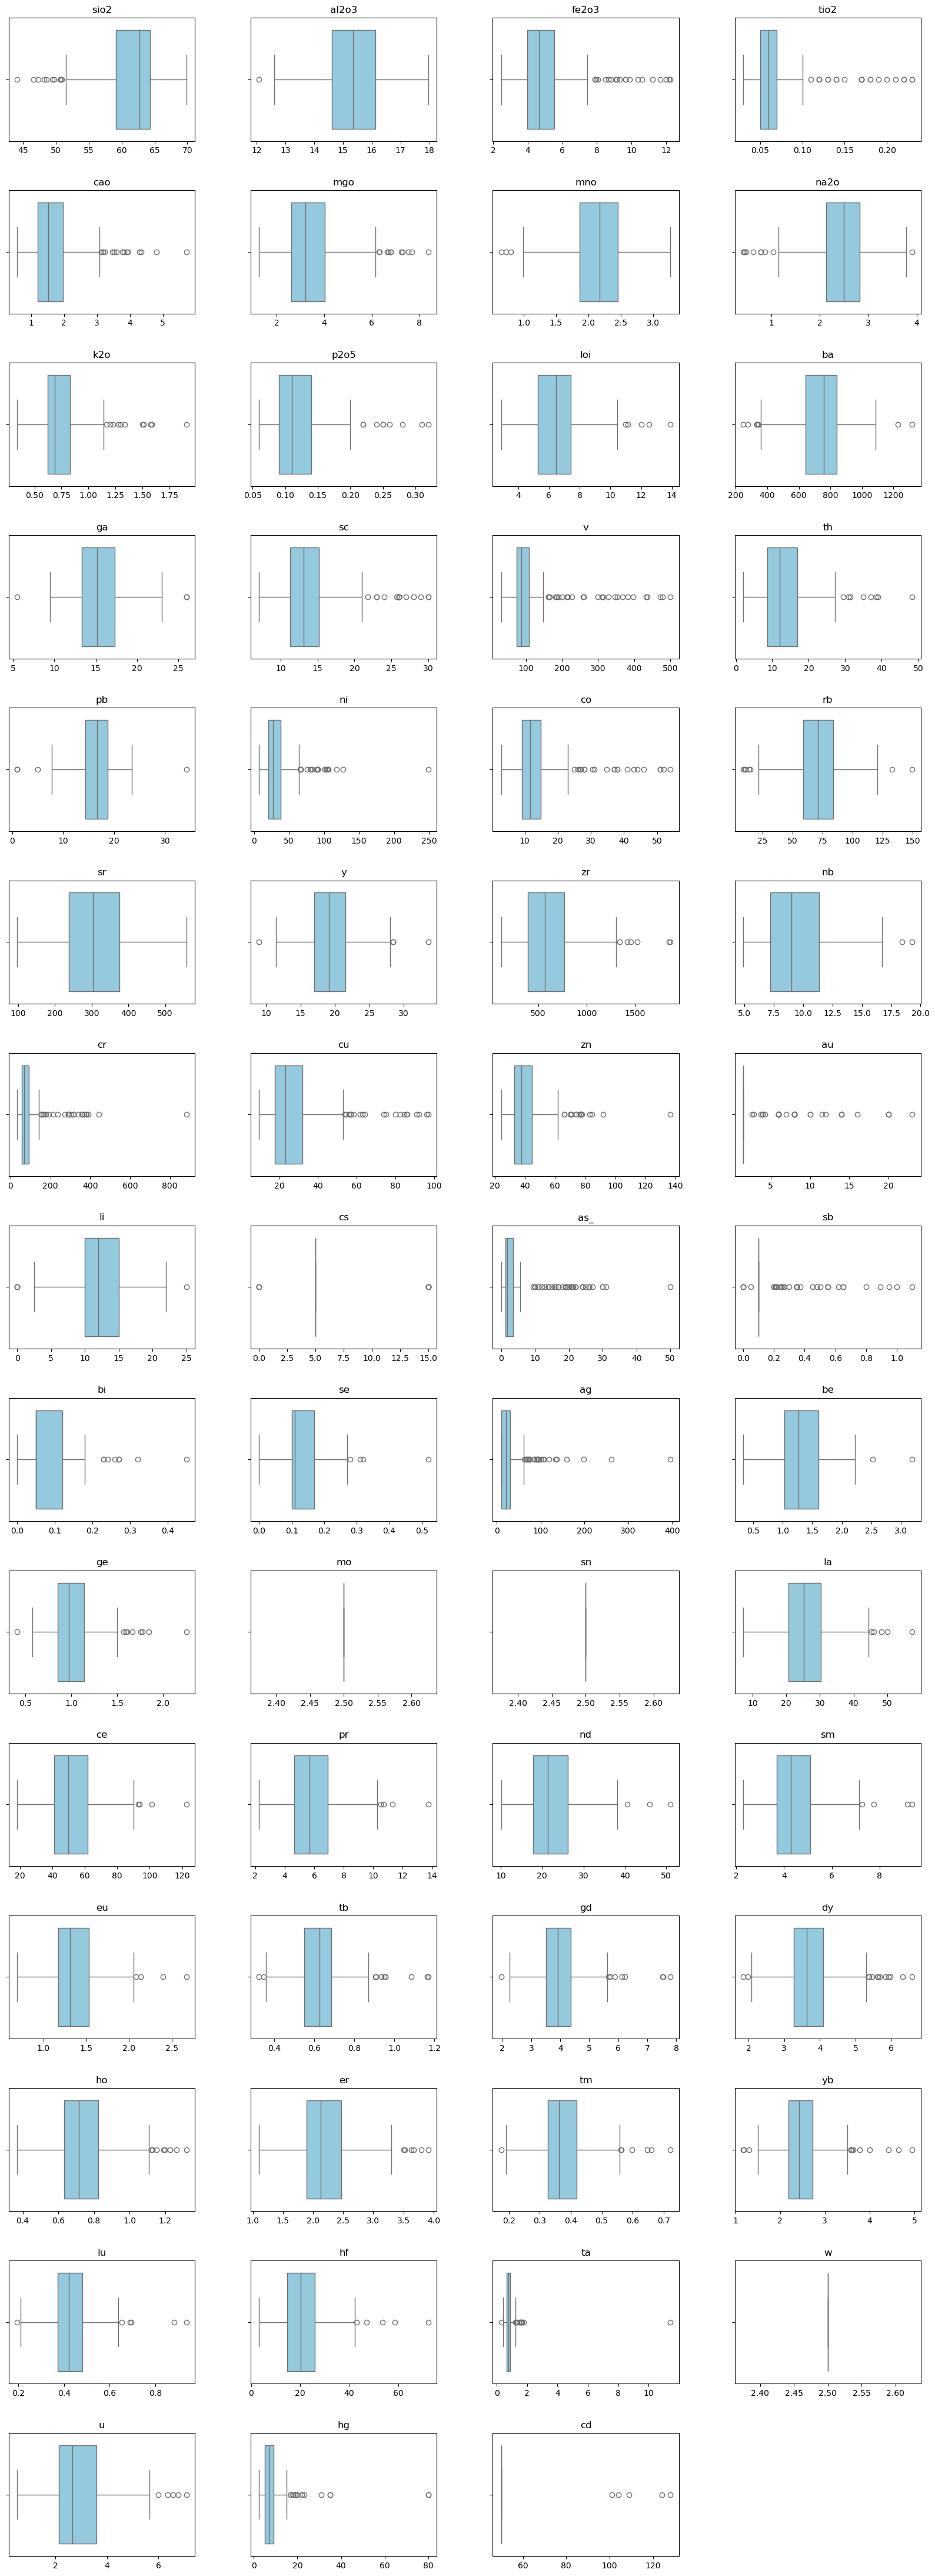

In [178]:
n_elem = len(str_elem)

fig, axes = plt.subplots(nrows=(n_elem+1)//4, 
                         ncols=4, 
                         figsize=(20, 4 * (n_elem//4)))

fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust spacing between plots

# Plot each element in its subplot
for i, (elem, ax) in enumerate(zip(str_sed_data[str_elem].columns, axes.flatten())):
    sns.boxplot(x=str_sed_data[str_elem][elem], 
                ax=ax, 
                color="skyblue")
    ax.set_title(elem)
    ax.set_xlabel('')  # Clear the x-labels if they clutter the plot

#If there are any leftover axes, turn them off
for j in range(i + 1, ((n_elem+1)//4) * 4):
    axes.flatten()[j].set_visible(False)

plt.show()

- Detecting outliers via Inter-Quartile Range and handling using capping method

In [179]:
for elem in list(str_sed_data[str_elem].columns):
    if elem != 'au':
        Q1 = str_sed_data[elem].quantile(0.25)
        Q3 = str_sed_data[elem].quantile(0.75)
        IQR = Q3 - Q1
        lwr_bnd = Q1 - (1.5 * IQR)
        upr_bnd = Q3 + (1.5 * IQR)
    
        str_sed_data[elem] = str_sed_data[elem].apply(lambda x: upr_bnd if x > upr_bnd else x)

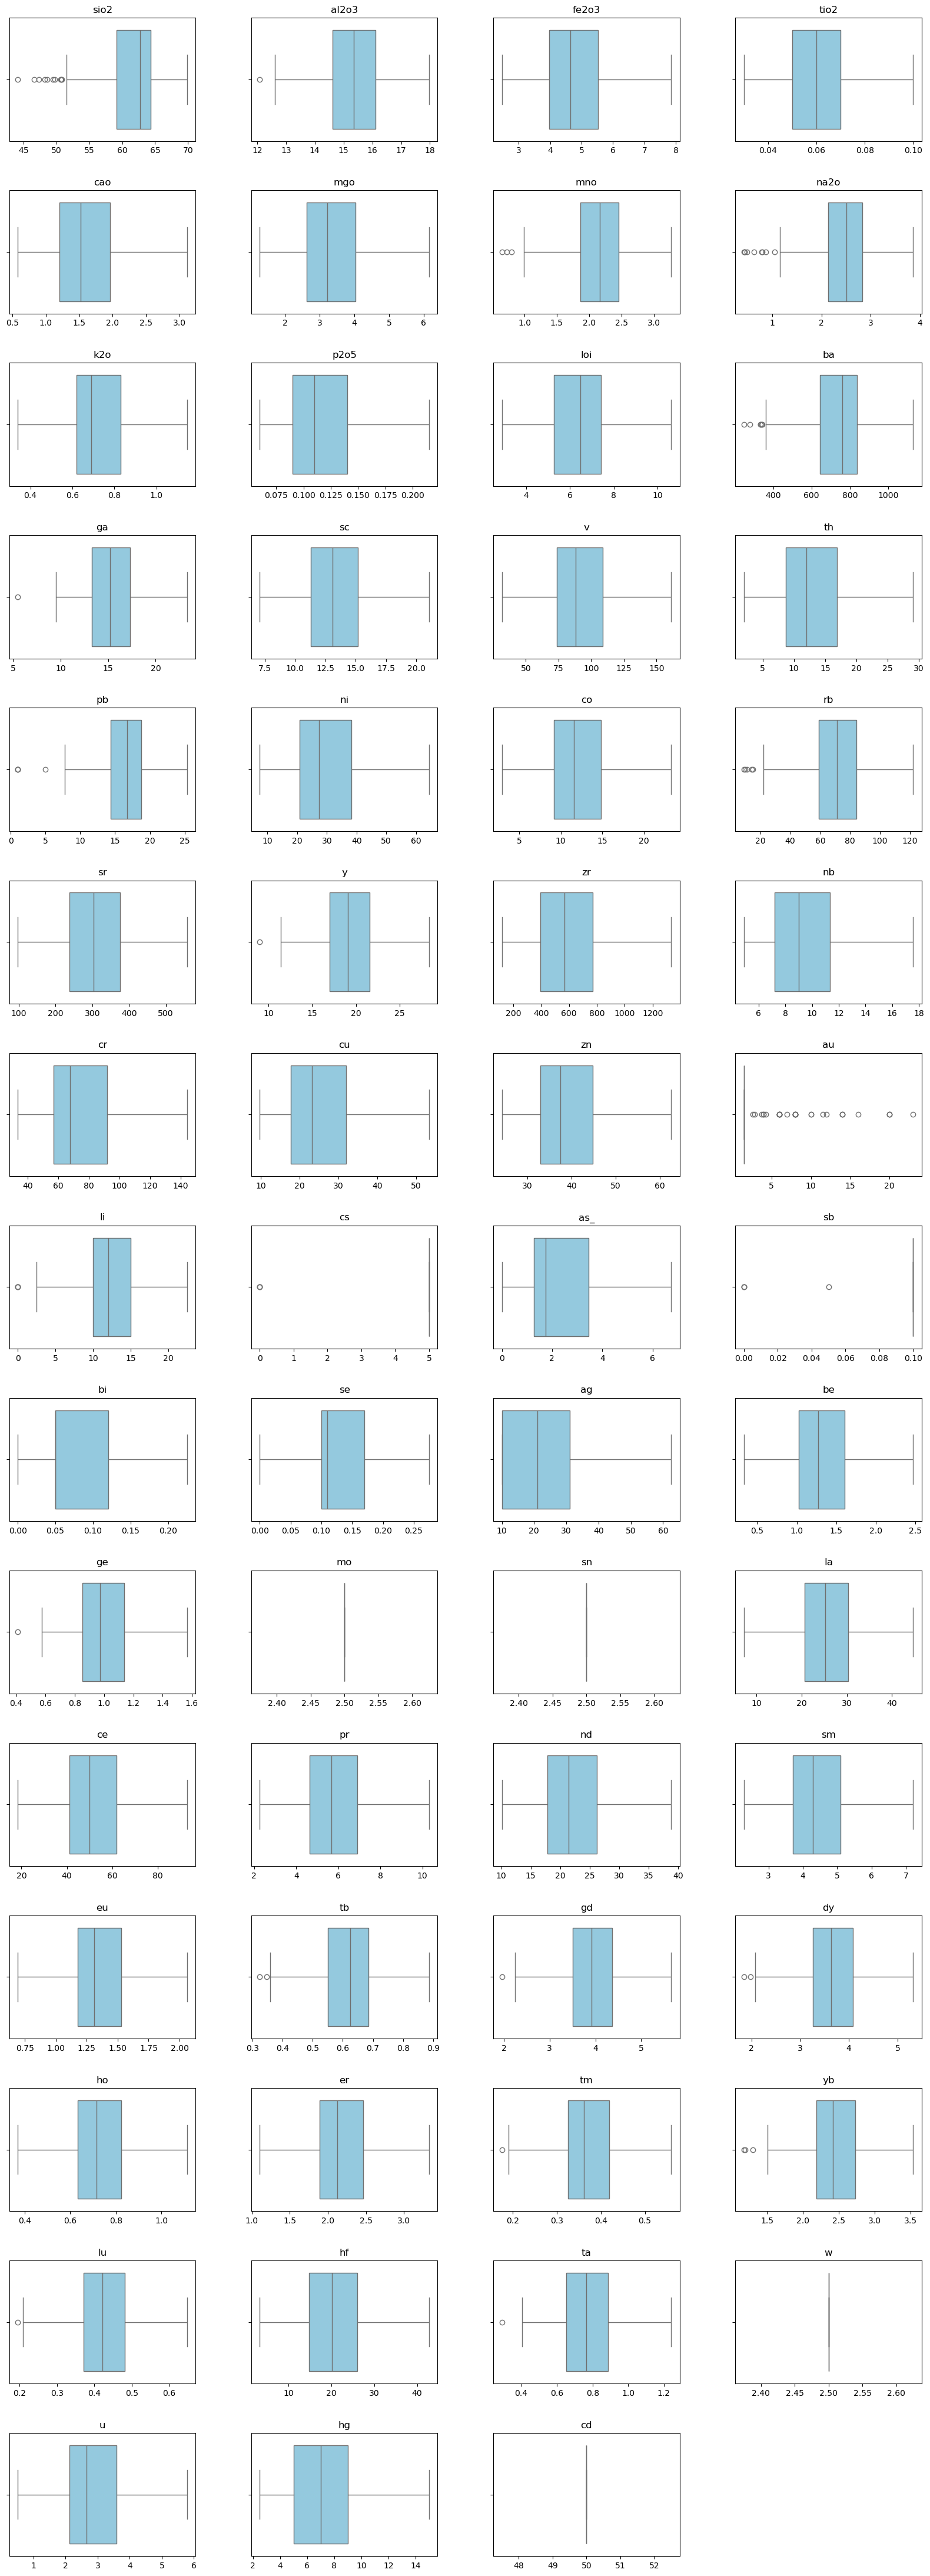

In [180]:
n_elem = len(str_elem)

fig, axes = plt.subplots(nrows=(n_elem+1)//4, 
                         ncols=4, 
                         figsize=(20, 4 * (n_elem//4)))

fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust spacing between plots

# Plot each element in its subplot
for i, (elem, ax) in enumerate(zip(str_sed_data[str_elem].columns, axes.flatten())):
    sns.boxplot(x=str_sed_data[str_elem][elem], 
                ax=ax, 
                color="skyblue")
    ax.set_title(elem)
    ax.set_xlabel('')  # Clear the x-labels if they clutter the plot

#If there are any leftover axes, turn them off
for j in range(i + 1, ((n_elem+1)//4) * 4):
    axes.flatten()[j].set_visible(False)

plt.show()

### Normalize values

In [181]:
str_elem_df = str_sed_data[str_elem]

sc = StandardScaler()

norm_str_elem = sc.fit_transform(str_elem_df)

norm_str_elem_df = pd.DataFrame(norm_str_elem, 
                                index=str_elem_df.index, 
                                columns=str_elem)

norm_str_elem_df.head()

,sio2,al2o3,fe2o3,tio2,cao,mgo,mno,na2o,k2o,p2o5,...,er,tm,yb,lu,hf,ta,w,u,hg,cd
0,0.075123,-0.662701,-0.306339,-0.889183,1.019935,-0.193320,-1.330500,0.061160,-0.716158,0.318752,...,-0.112137,-0.148668,-0.367723,-0.128223,0.679186,-0.577320,0.0,0.120580,0.177150,0.0
1,0.109229,-1.431804,-0.522343,-0.889183,1.265203,0.589384,-1.330500,0.206276,-0.550984,0.049701,...,0.449379,0.604243,0.855909,0.875840,1.803613,-0.081458,0.0,0.437902,0.430400,0.0
2,1.545162,-1.737289,-1.416152,-0.889183,-0.549778,-0.236803,1.552665,1.060848,0.054651,-1.026501,...,-0.577359,-0.538397,-0.300984,-0.020121,0.324116,-0.385500,0.0,0.552364,-1.215725,0.0
3,0.737340,-0.955607,-1.088422,-0.889183,0.153322,-0.315074,0.395190,0.641624,-0.771215,0.049701,...,-0.509827,-0.829977,-0.579963,-0.287385,0.137794,-0.237227,0.0,1.194650,1.949900,0.0
4,0.595671,-1.198198,-0.626621,-0.889183,0.300483,-0.193320,-0.067800,0.657748,0.054651,1.125904,...,-0.317783,-0.475010,-0.303020,0.072840,0.660510,0.212706,0.0,1.174469,1.949900,0.0


In [182]:
pca = PCA(n_components=10)
pca.fit(norm_str_elem_df)

PCA(n_components=10)

In [183]:
total_variance = sum(pca.explained_variance_)
desired_variance = 0.75
cumulative_variance = 0
num_comp = 0

for explained_variance_ in pca.explained_variance_:
    cumulative_variance += explained_variance_
    if cumulative_variance / total_variance >= desired_variance:
        break
    num_comp += 1

print(f"Number of components to explain atleast {desired_variance*100}% of variance: {num_comp}")

Number of components to explain atleast 75.0% of variance: 3


In [184]:
pca.explained_variance_ratio_

array([0.31878458, 0.21093821, 0.07904128, 0.04986235, 0.03738739,
       0.03333969, 0.03214514, 0.02729415, 0.02584111, 0.02122805])

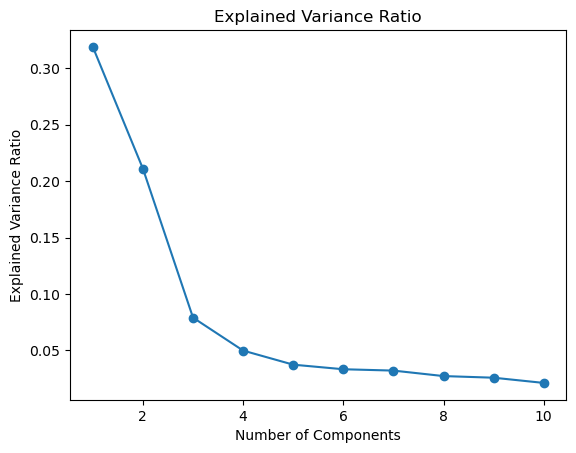

In [185]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_, 
         marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio')
plt.show()

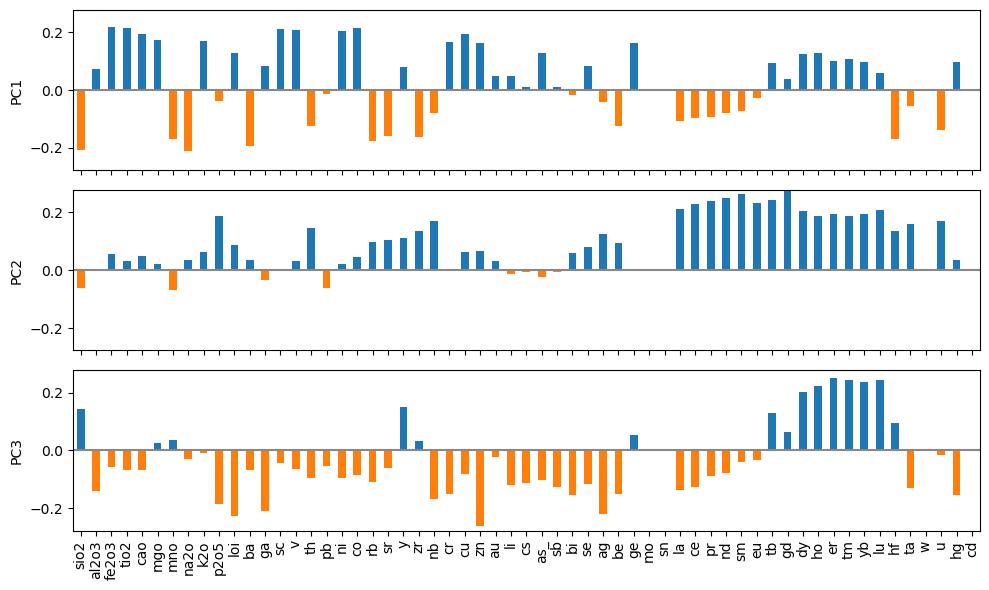

In [186]:
loadings = pca.components_
num_com_to_plot = 3
loadings_to_plot = loadings[:num_com_to_plot]
loadings_df = pd.DataFrame(loadings_to_plot, 
                           columns=str_elem)

# Calculate the maximum absolute value for setting y-axis limits
max_pc = 1.01 * np.max(np.abs(loadings_to_plot))

# Plot loadings for each principal component
fig, axes = plt.subplots(num_com_to_plot, 
                         1, 
                         figsize=(10, 6), 
                         sharex=True)

for i, ax in enumerate(axes):
    pc_loadings = loadings_df.iloc[i]
    colors = ['C0' if l > 0 else 'C1' for l in pc_loadings]
    ax.axhline(color='#888888')
    pc_loadings.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'PC{i+1}')
    ax.set_ylim(-max_pc, max_pc)

plt.tight_layout()
plt.show()

### Fit and Transform using PCA on elements

In [187]:
pca = PCA(n_components=3)
pca_elem = pca.fit_transform(norm_str_elem_df)

In [188]:
pca_str_sed_df = pd.concat([str_sed_data[['gid', 'longitude', 'latitude']], 
                            pd.DataFrame(pca_elem, columns=['PC1', 'PC2', 'PC3'])], 
                           axis=1)
pca_str_sed_df.head()

,gid,longitude,latitude,PC1,PC2,PC3
0,2947,77.657407,14.475225,-1.720575,2.197885,0.330361
1,2948,77.675926,14.475225,-1.808022,2.959652,2.070594
2,2949,77.694444,14.475225,-4.916672,-1.472785,2.443847
3,2950,77.712963,14.475225,-4.135806,-0.376914,2.998275
4,2951,77.731481,14.475225,-3.229328,1.064327,-0.323933


# KMeans Clustering to define clusters/target feature

## Finding the right k

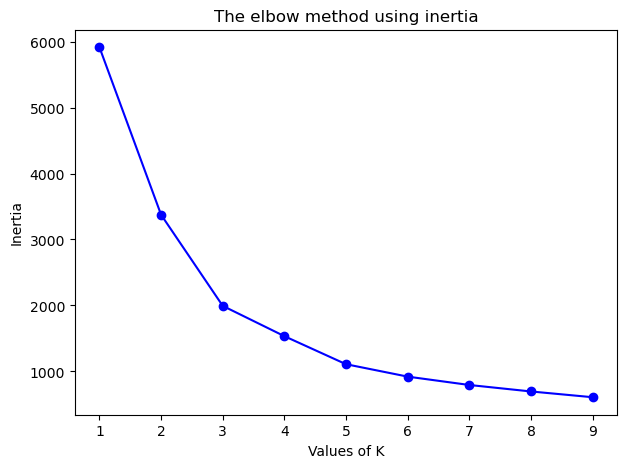

In [189]:
inertia = []                                     ## Sum-of-squared distances
for k in range(1, 10):
    km = KMeans(
        n_clusters=k, init='random',
        n_init=10, max_iter=300, 
        tol=1e-03, random_state=0
    )
    km.fit_predict(pca_str_sed_df[['PC1', 'PC2']])
    inertia.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(range(1, 10), 
         inertia, 
         'bo-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The elbow method using inertia')
plt.show()

In [233]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-03, random_state=0
)
y_km = km.fit_predict(pca_str_sed_df[['PC1', 'PC2', 'PC3']])

In [234]:
y_km = y_km + 1
np.unique(y_km)

array([1, 2, 3])

In [235]:
clustered_data = pd.concat([str_sed_data[['gid', 'longitude', 'latitude']], 
                            pd.DataFrame(y_km, columns=['clusters'])], 
                           axis=1)

In [236]:
min_lat_limit = sed_min_lat - 0.05
max_lat_limit = sed_max_lat + 0.05
min_long_limit = sed_min_long - 0.05 
max_long_limit = sed_max_long + 0.05

print(f'Min latitude: {np.round(min_lat_limit, 4)}\tMax latitude: {np.round(max_lat_limit, 4)}')
print(f'Min longitude: {np.round(min_long_limit, 4)}\tMax longitude: {np.round(max_long_limit, 4)}')

Min latitude: 14.209	Max latitude: 14.5432
Min longitude: 77.45	Max longitude: 77.8


## Plot based on each cluster

In [237]:
pca_str_sed_df['cluster'] = clustered_data['clusters']
pca_str_sed_df.head()

,gid,longitude,latitude,PC1,PC2,PC3,cluster
0,2947,77.657407,14.475225,-1.720575,2.197885,0.330361,2
1,2948,77.675926,14.475225,-1.808022,2.959652,2.070594,2
2,2949,77.694444,14.475225,-4.916672,-1.472785,2.443847,1
3,2950,77.712963,14.475225,-4.135806,-0.376914,2.998275,1
4,2951,77.731481,14.475225,-3.229328,1.064327,-0.323933,2


<Axes: xlabel='PC1', ylabel='PC2'>

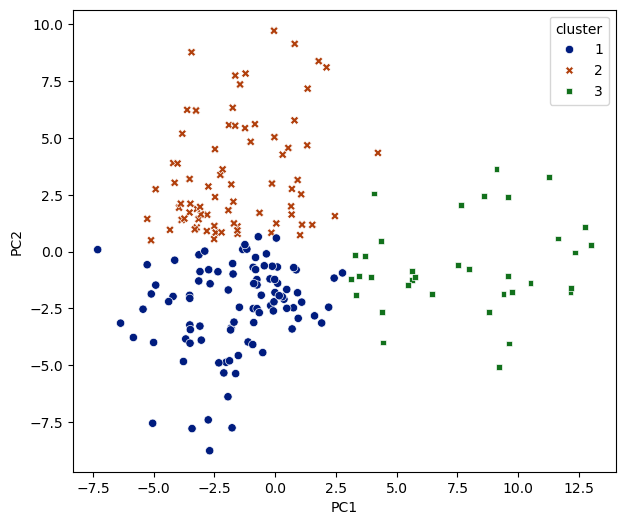

In [238]:
palette = sns.color_palette("dark", 
                            as_cmap=False, 
                            n_colors=len(pca_str_sed_df['cluster'].unique()))

plt.figure(figsize=(7,6))
sns.scatterplot(x='PC1', 
                y='PC2', 
                hue='cluster', 
                style='cluster', 
                data=pca_str_sed_df,
                palette=palette)

In [239]:
# Create a list to store individual figure objects
fig_list = []

# Loop through each cluster
for cluster_id in clustered_data['clusters'].unique():
    # Filter data for the current cluster
    cluster_data = clustered_data[clustered_data['clusters'] == cluster_id]

    hover_text = [f'Sediment ID: {gid}<br>Latitude: {lat}<br>Longitude: {lon}' 
                  for gid, lat, lon in zip(cluster_data['gid'], 
                                           cluster_data['latitude'], 
                                           cluster_data['longitude'])]
    
    # Create a scatter mapbox trace
    trace = go.Scattermapbox(
        lat=cluster_data['latitude'],
        lon=cluster_data['longitude'],
        mode='markers',
        marker=dict(
            size=10,
            color='blue',  # You can assign different colors for each cluster
            opacity=0.8
        ),
        text=hover_text,  # Text to be displayed on hover
        hoverinfo='text'  # Display bore hole id, latitude and longitude text on hover
    )
    
    # Create layout for the map
    layout = go.Layout(
        title=f'Cluster {cluster_id}',
        hovermode='closest',
        mapbox=dict(
            style='open-street-map',  # You can choose different map styles
            center=dict(
                lat=cluster_data['latitude'].mean(),  # Set the map center to the mean of latitudes
                lon=cluster_data['longitude'].mean()  # Set the map center to the mean of longitudes
            ),
            zoom=10, 
            bounds=dict(
                south=min_lat_limit,
                north=max_lat_limit,
                west=min_long_limit,
                east=max_long_limit
            )
        )
    )
    
    # Create figure object and add trace and layout
    fig = go.Figure(data=trace, layout=layout)

    fig.update_layout(
        autosize=False,
        width=700,
        height=700,
    )
    
    # Append the figure to the list
    fig_list.append(fig)

# Display each figure
for fig in fig_list:
    fig.show(renderer='browser')

## Plot combining all clusters

In [215]:
# Create text to display on hover with gid, latitude, and longitude
hover_text = [f'Latitude: {lat}<br>Longitude: {lon}<br>Sediment ID: {gid}' 
              for lat, lon, gid in zip(clustered_data['latitude'], 
                                       clustered_data['longitude'], 
                                       clustered_data['gid'])]

colors = ['#891ed2', '#b45f06', '#d30202', '#203254']

# Create a scatter mapbox trace
trace = go.Scattermapbox(
    lat=clustered_data['latitude'],
    lon=clustered_data['longitude'],
    mode='markers',
    marker=dict(
        size=10,
        color=[colors[c % len(colors)] for c in clustered_data['clusters']],  # You can assign different colors for each cluster
        opacity=0.8
    ),
    text=hover_text,  # Text to be displayed on hover
    hoverinfo='text'  # Display only the text on hover
)

# Create layout for the map
layout = go.Layout(
    title=f'Sediment Clusters',
    hovermode='closest',
    mapbox=dict(
        style='open-street-map',  # You can choose different map styles
        center=dict(
            lat=clustered_data['latitude'].mean(),  # Set the map center to the mean of latitudes
            lon=clustered_data['longitude'].mean()  # Set the map center to the mean of longitudes
        ),
        zoom=10, 
        bounds=dict(
            south=min_lat_limit,
            north=max_lat_limit,
            west=min_long_limit,
            east=max_long_limit
        )
    )
)

# Create figure object and add trace and layout
fig = go.Figure(data=trace, layout=layout)

fig.update_layout(
    autosize=False,
    width=700,
    height=700,
)

# Display the figure
fig.show(renderer='browser')


In [228]:
str_sed_data['cluster'] = clustered_data['clusters']
str_sed_data.head()

,gid,objectid,sampleno,longitude,latitude,sio2,al2o3,fe2o3,tio2,cao,...,yb,lu,hf,ta,w,u,toposheet,hg,cd,cluster
0,2947,2947,57F11/177/SS/12,77.657407,14.475225,61.921,14.606,4.51,0.05,2.28,...,2.290226,0.413697,26.874492,0.677483,2.5,3.016905,57F11,8.0,50.0,2
1,2948,2948,57F11/178/SS/12,77.675926,14.475225,62.077,13.750,4.22,0.05,2.43,...,2.891123,0.500104,37.079419,0.774466,2.5,3.378550,57F11,9.0,50.0,2
2,2949,2949,57F11/179/SS/12,77.694444,14.475225,68.645,13.410,3.02,0.05,1.32,...,2.323000,0.423000,23.652000,0.715000,2.5,3.509000,57F11,2.5,50.0,4
3,2950,2950,57F11/180/SS/12,77.712963,14.475225,64.950,14.280,3.46,0.05,1.75,...,2.186000,0.400000,21.961000,0.744000,2.5,4.241000,57F11,15.0,50.0,4
4,2951,2951,57F11/181/SS/12,77.731481,14.475225,64.302,14.010,4.08,0.05,1.84,...,2.322000,0.431000,26.705000,0.832000,2.5,4.218000,57F11,15.0,50.0,2


## Saving the models

In [229]:
model_path = (os.path.join(curr_dir, 'Models/4 clusters/')).replace('\\', '/')

In [230]:
with open(model_path + 'standard_scaler.pkl', 'wb') as file:
    pkl.dump(sc, file)

with open(model_path + 'pca.pkl', 'wb') as file:
    pkl.dump(pca, file)

with open(model_path + 'kmeans.pkl', 'wb') as file:
    pkl.dump(km, file)

## Loading saved models

In [104]:
with open(model_path + 'standard_scaler.pkl', 'rb') as file:
    sc = pkl.load(file)

with open(model_path + 'pca.pkl', 'rb') as file:
    pca = pkl.load(file)

with open(model_path + 'kmeans.pkl', 'rb') as file:
    km = pkl.load(file)

# Unsupervised Learning

In [105]:
def predict_cluster(new_obs, sc, pca, km):

    # Filter the required element values
    new_obs = new_obs[5:]
    new_obs = [item for item in new_obs if isinstance(item, (int, float)) and item != 0]

    # Normalise the values
    new_obs_scaled = sc.transform([new_obs])

    # Transform using PCA to obtain Principle Components
    new_obs_pca = pca.transform(new_obs_scaled)

    # Predict the cluster
    prediction = km.predict(new_obs_pca)

    return prediction

In [111]:
new_obsrv = list((str_sed_data[str_sed_data['gid'] == 2949].values).flatten())
pred_clstr = predict_cluster(new_obsrv, sc, pca, km)
print(f"The new observation belongs to cluster: {pred_clstr[0]}")

The new observation belongs to cluster: 1


In [231]:
new_str_sed_data = str_sed_data.copy()
new_str_sed_data['cluster'] = clustered_data['clusters']
new_str_sed_data.head()

,gid,objectid,sampleno,longitude,latitude,sio2,al2o3,fe2o3,tio2,cao,...,yb,lu,hf,ta,w,u,toposheet,hg,cd,cluster
0,2947,2947,57F11/177/SS/12,77.657407,14.475225,61.921,14.606,4.51,0.05,2.28,...,2.290226,0.413697,26.874492,0.677483,2.5,3.016905,57F11,8.0,50.0,2
1,2948,2948,57F11/178/SS/12,77.675926,14.475225,62.077,13.750,4.22,0.05,2.43,...,2.891123,0.500104,37.079419,0.774466,2.5,3.378550,57F11,9.0,50.0,2
2,2949,2949,57F11/179/SS/12,77.694444,14.475225,68.645,13.410,3.02,0.05,1.32,...,2.323000,0.423000,23.652000,0.715000,2.5,3.509000,57F11,2.5,50.0,4
3,2950,2950,57F11/180/SS/12,77.712963,14.475225,64.950,14.280,3.46,0.05,1.75,...,2.186000,0.400000,21.961000,0.744000,2.5,4.241000,57F11,15.0,50.0,4
4,2951,2951,57F11/181/SS/12,77.731481,14.475225,64.302,14.010,4.08,0.05,1.84,...,2.322000,0.431000,26.705000,0.832000,2.5,4.218000,57F11,15.0,50.0,2


In [232]:
new_str_sed_data.to_csv(data_path+'/4 clusters/new_stream_sediments_57F11.csv', index=False)